In [1]:
from collections import defaultdict
import random

from tqdm.notebook import tqdm

import pandas as pd
from collections import Counter

from scipy import sparse
from scipy.sparse.linalg import svds
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity

from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize

import glob
import re
import matplotlib.pyplot as plt

import math

In [43]:
def create_book_dictionary(book_folder_name):
    glob_name = book_folder_name + '/*'
    books_in_folder = glob.glob(glob_name)
    book_path = book_folder_name + '\\'
    
    dict_name = {}
    all_book = ""
    book_name_start = len(book_path)
    
    for b in books_in_folder:
        book = b[book_name_start:]
        with open(book_path+book,encoding="utf8") as fi:
            book_r = fi.read()
        start_b = re.search(r"\*\*\*[^\*]+\*\*\*",book_r)
        end = start_b.end()
        try_book = book_r[end:]
        end_b = re.search(r"\*\*\*[^\*]+\*\*\*",try_book)
        cut_off = end_b.start()
        complete_b = try_book[:cut_off]
        c_book = complete_b.replace('\n', ' ')
        book_name = book[:-4]
        dict_name[book_name] = c_book
    return dict_name

In [318]:
def voynich_cleaner():
    book_folder_name = 'manuscript_text'
    glob_name = book_folder_name + '/*'
    books_in_folder = glob.glob(glob_name)
    book_path = book_folder_name + '\\'

    dict_name = {}
    all_book = ""
    book_name_start = len(book_path)
    
    for b in books_in_folder:
        book = b[book_name_start:]
        with open(book_path+book,encoding="utf8") as fi:
            book_r = fi.read()
        c_book = re.sub(r'\#[^\n]+\n', '',book_r)
        m_book = re.sub(r'\|[^|]*\)', '',c_book)
        f_book = re.sub(r'\(', '',m_book)
        p_book = re.sub(r'[_]{4,}', '',f_book)
        #c_book = re.sub(r'\#', '',book_r)
        #c_book_repalced = c_book.replace(r',', ' ')
        book_name = book[:-4]
        dict_name[book_name] = p_book
    return(dict_name)

In [44]:
def create_common_df(max_word_count, book_dictionary):
    column_name_list = list((range(1, max_word_count + 1)))
    
    log_name_list = []
    for r in column_log_list:
        log_name_list.append(math.log(r))
        
    cmn_word_df = pd.DataFrame(columns=column_name_list)
    cmn_word_df.loc[0,:] = log_name_list
    
    count = 0
    book_index = []
    for b in book_dictionary:
        word_rank = 0 
        false_word = ['s','t','n','5','10','15','20']
        ind = []
        fre = []
        fretwo = []
        run = 1
        book_token_words = [x.lower() for x in regexp_tokenize(book_dictionary[b], '\w+')]
        if len(book_token_words) > 9999:
            book_index.append(b)
            book_token_counter = Counter(book_token_words).most_common(max_word_count+20)
            max_fre = 0
            for item in book_token_counter:
                if item[0] not in false_word:
                    if word_rank < max_word_count:
                        ind.append(item[0])
                        fre.append(item[1])
                        fretwo.append(math.log(item[1]))
                        if (item[1]*run) > max_fre:
                            max_fre = item[1]*run
                        run = run + 1
                        word_rank = word_rank + 1
            cmn_word_df.loc[count+1,:] = fretwo
            count = count + 1
            print(b)
            print(book_token_counter)
    return(cmn_word_df)

In [45]:
def pfit_slope(fit_df):
    form_fit_df = fit_df.apply(pd.to_numeric)
    count = 0
    for row in fit_df.iterrows():
        if count != 0:
            theta = np.polyfit(form_fit_df.loc[0,:], form_fit_df.loc[count,:], 1)
            print("{} slope".format(theta[0]))
        count = count + 1

In [46]:
def full_book_dictionary(book_folder_name):
    glob_name = book_folder_name + '/*'
    books_in_folder = glob.glob(glob_name)
    book_path = book_folder_name + '\\'
    
    dict_name = {}
    all_book = ""
    book_name_start = len(book_path)
    
    for b in books_in_folder:
        book = b[book_name_start:]
        with open(book_path+book,encoding="utf8") as fi:
            book_r = fi.read()
        c_book = book_r.replace('\n', ' ')
        book_name = book[:-4]
        dict_name[book_name] = c_book
    return dict_name

In [323]:
def full_common_df(book_dictionary):
    column_name_list = list((range(1, 90000 + 1)))
    
    log_name_list = []
    for r in column_name_list:
        log_name_list.append(math.log(r))
    
    column_name = ['rank_log']
    cmn_word_df = pd.DataFrame(columns=column_name)
    cmn_word_df['rank_log']= log_name_list
    #cmn_word_df.loc[0,:] = log_name_list
    
    count = 0
    book_index = []
    for b in book_dictionary:
        word_rank = 0 
        false_word = ['s','t','n','5','10','15','20']
        ind = []
        fre = []
        fretwo = []
        book_df_header = [b]
        single_book_df = pd.DataFrame(columns=book_df_header)
        run = 1
        book_token_words = [x.lower() for x in regexp_tokenize(book_dictionary[b], '\w+')]
        book_total_words = len(book_token_words)
        print(book_total_words)
        print(len(book_token_words))
        if len(book_token_words) > 0:
            book_index.append(b)
            book_token_counter = Counter(book_token_words).most_common()
            print(book_token_counter)
            max_fre = 0
            for item in book_token_counter:
                if item[0] not in false_word:
                    ind.append(item[0])
                    fre.append(item[1])
                    exp_rank_num = item[1] / book_total_words
                    fretwo.append(math.log(exp_rank_num))
                    if (item[1]*run) > max_fre:
                        max_fre = item[1]*run
                    run = run + 1
                    word_rank = word_rank + 1
            single_book_df[b] = fretwo
            cmn_word_df = pd.concat([cmn_word_df,single_book_df], axis=1)
            #cmn_word_df.loc[count+1,:] = fretwo
            count = count + 1
    return(cmn_word_df)

In [272]:
def new_common_df(book_dictionary, max_word = 30000):
    column_name_list = list((range(1, max_word + 1)))
    
    log_name_list = []
    for r in column_name_list:
        #exp_rank_num = z_law_math(r)
        #exp_rank_num = (1/((r+1)**1))
        #log_name_list.append(math.log(exp_rank_num))
        log_name_list.append(math.log(r))
    
    column_name = ['rank_log']
    cmn_word_df = pd.DataFrame(columns=column_name)
    cmn_word_df['rank_log']= log_name_list
    count = 0
    book_index = []
    false_word = ['s','t','n','5','10','15','20']
    
    for b in book_dictionary:
        word_rank = 0 
        fretwo = []
        book_df_header = [b]
        single_book_df = pd.DataFrame(columns=book_df_header)
        run = 1
        book_token_words = [x.lower() for x in regexp_tokenize(book_dictionary[b], '\w+')]
        book_total_words = len(book_token_words)
        if len(book_token_words) > 0:
            book_index.append(b)
            book_token_counter = Counter(book_token_words).most_common()
            total_words = len(book_token_counter)
            max_fre = 0
            
            for item in book_token_counter:
                if item[0] not in false_word:
                    if word_rank < total_words:
                        exp_rank_num = item[1] / book_total_words
                        #exp_rank_num = item[1] * math.log()
                        #fretwo.append(math.log(exp_rank_num))
                        #fretwo.append(z_law_math(item[1]))
                        fretwo.append(math.log(exp_rank_num ))
                        if (item[1]*run) > max_fre:
                            max_fre = item[1]*run
                        run = run + 1
                        word_rank = word_rank + 1
                else:
                    total_words = total_words - 1
            single_book_df[b] = fretwo
            cmn_word_df = pd.concat([cmn_word_df,single_book_df], axis=1)
            count = count + 1
    return(cmn_word_df)

In [241]:
def tokenize_dictionary(book_text_d):
    
    book_tokenized_dictionary = {}
    
    for b in book_text_d:
        book_tokenized = regexp_tokenize(book_text_d[b], '\w+')
        if len(book_tokenized) > 0:
            book_tokenized_dictionary[b] = book_tokenized
    return(book_tokenized_dictionary)

In [242]:
def new_slope(fit_df, book_text_d, graph_check = "no"):
    form_fit_df = fit_df.apply(pd.to_numeric)
    count = 0
    for col in fit_df.columns:
        row_len = fit_df[col].count()
        if count != 0:
            total_words = len(regexp_tokenize(book_text_d[col], '\w+'))
            theta, alpha = np.polyfit(form_fit_df.iloc[:row_len,0], form_fit_df.iloc[:row_len,count], 1)
            if graph_check == "yes":
                plt.scatter(fit_df.iloc[:,0], fit_df.iloc[:,count], alpha=.5)
                #plt.plot(theta, alpha)
                #plt.plot(fit_df.iloc[:,0], 8 -1* fit_df.iloc[:,0], '-')
                plt.xlabel("Word Rank")
                plt.ylabel("Word Frequency")
                #plt.plot(x, b + m * x, '-')
                plt.show()
                #print("{} slope on {} unique words and {} total words for {}".format(theta[0],row_len,total_words,col))
            else:
                theta = np.polyfit(form_fit_df.iloc[:row_len,0], form_fit_df.iloc[:row_len,count], 1)
                #print("{} slope on {} unique words and {} total words for {}".format(theta[0],row_len,total_words,col))
        count = count + 1

In [243]:
def plot_df(log_df):
    plt.rcParams["figure.figsize"] = [15, 10]
    count = 0
    for col in log_df.columns:
        if count != 0:
            plt.scatter(log_df.iloc[:,0], log_df.iloc[:,count], alpha=.5)
        count = count + 1

In [258]:
def zipf_df(token_numbers,word_counts_df):
    total_words = len(token_numbers)
    
    column_name_list = list((range(1, 90000 + 1)))
    
    log_name_list = []
    for r in column_name_list:
        #exp_rank_num = z_law_math(r)
        #exp_rank_num = (1/((r+1)**1))
        #log_name_list.append(math.log(exp_rank_num))
        log_name_list.append(math.log(r))
    
    column_name = ['rank_log']
    exp_word_df = pd.DataFrame(columns=column_name)
    exp_word_df['rank_log']= log_name_list
    
    for b in token_numbers:
        total_u_words = word_counts_df[b].count()
        total_words = len(token_numbers[b])
        #total_words = total_u_words
        total_u_words = word_counts_df[b].count()
        book_exp_list = []
        
        book_df_header = [b]
        single_book_df = pd.DataFrame(columns=book_df_header)
    
        for x in range(total_words):
            exp_rank_num = z_law_math(x)
            exp_r_n = (total_words*exp_rank_num)
            #exp_rank_num = total_words * (1/((x+2.7)**1))
            #book_exp_list.append(math.log(exp_rank_num))
            #book_exp_list.append((exp_rank_num))
            #book_exp_list.append(math.log(x+1))
            book_exp_list.append(math.log(exp_rank_num))
        #single_book_df[b] = book_exp_list[::-1]
        single_book_df[b] = book_exp_list
        exp_word_df = pd.concat([exp_word_df,single_book_df], axis=1)
    return(exp_word_df)

In [285]:
def plot_exp_df(log_df, exp_df):
    plt.rcParams["figure.figsize"] = [12, 8]
    count = 0
    max_row = log_df.iloc[:,1].count()
    print(max_row)
    for col in log_df.columns:
        if count != 0:
            #plt.scatter(log_df.iloc[:,count]*-1, log_df.iloc[:,0], alpha=.5)
            plt.scatter(log_df.iloc[:,0], log_df.iloc[:,count], alpha=.5)
            #plt.scatter(log_df.iloc[:,count], log_df.iloc[:,0], alpha=.5)
            plt.plot(exp_df.iloc[:max_row,0], exp_df.iloc[:max_row,count], color='black', linestyle='--', alpha=1, linewidth=2)
            #plt.scatter(fit_df.iloc[:,0], fit_df.iloc[:,count], alpha=.5)
            #plt.plot(theta, alpha)
            #plt.plot(exp_df.iloc[:,0], 8 -1* exp_df.iloc[:,0], '-')
            plt.xlabel("Log Word Rank")
            plt.ylabel("Log Word Prob Frequency")
            #plt.ylim([-1, 10])
            #plt.scatter(exp_df.iloc[:,count], exp_df.iloc[:,0], alpha=.5)
            plt.show()
        count = count + 1

In [286]:
def combine_books(token_d):
    
    all_words = []
    
    for b in token_d:
        all_words.extend(token_d[b])
    
    return(all_words)

In [287]:
def combine_books_dictionary(indiv_books, string_name_d):
    
    all_book_dictionary = {}
    all_words = ""
    
    for b in indiv_books:
        all_words = all_words + indiv_books[b]
    
    all_book_dictionary[string_name_d] = all_words
    
    return(all_book_dictionary)

In [320]:
def z_law_math(num_check):
    z_result = (1/((num_check+3.7)**1.3))
    return(z_result)

In [310]:
def bar_top_words(b_d):
    for b in b_d:
        f_text = b_d[b]
        
        print_check = 10
        to_book = regexp_tokenize(f_text, '\w+')
        book_token_counter = Counter(to_book).most_common()
        total_words = len(book_token_counter)
        s_count = 0
        x_list = []
        y_list = []
        
        for item in book_token_counter:
            if s_count < print_check:
                x_list.append(item[0])
                y_list.append(item[1])
                s_count = s_count + 1
        plt.bar(x_list,y_list)
        plt.show()

In [311]:
def spilt_corpus(split_df):
    
    x_graph = []
    y_graph = []
    single_col_df = split_df.iloc[:,[1]]
    iter_num = single_col_df.count().values[0]
    
    
    for n in range(iter_num):
        nscore = split_df.iloc[n,1]
        freq = np.random.binomial(nscore, .5, 1)[0]
        x_graph.append(freq*(1/n))
        true = nscore - freq
        #print("{} is the number of runs. It splits as {} and {}".format(nscore,freq,true))
        y_graph.append(true)
    
    col_n = ["xg","yg"]
    two_corpus_df = pd.DataFrame(columns=col_n)
    two_corpus_df['xg']= x_graph
    two_corpus_df['yg']= y_graph
    
    return(two_corpus_df)

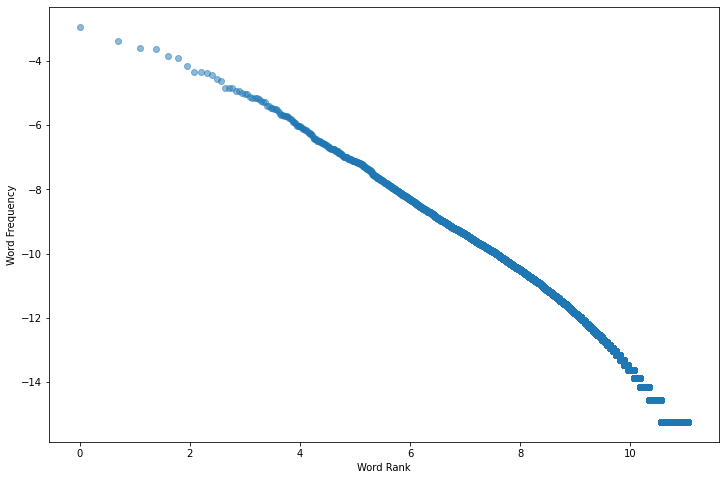

63348


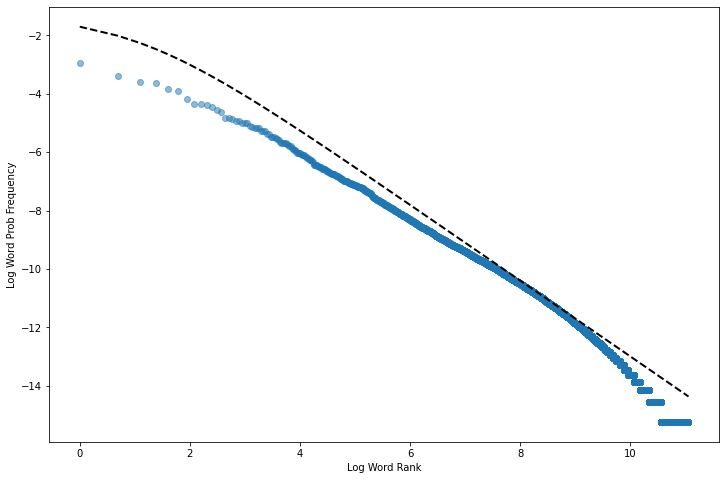

In [325]:
e_book_d = create_book_dictionary('english_books')
e_book_df = new_common_df(e_book_d)
new_slope(e_book_df, e_book_d)
full_text = tokenize_dictionary(e_book_d)
combine_test = combine_books_dictionary(e_book_d, "all_english_books")
e_book_df = new_common_df(combine_test,90000)
new_slope(e_book_df, combine_test,"yes")
full_text = tokenize_dictionary(combine_test)
expected_df = zipf_df(full_text,e_book_df)
plot_exp_df(e_book_df, expected_df)

In [ ]:
#bar_top_words(combine_test)

In [253]:
print()

In [266]:
print(expected_df.head())

   rank_log  all_english_books
0  0.000000          -1.700833
1  0.693147          -2.011831
2  1.098612          -2.262606
3  1.386294          -2.472740
4  1.609438          -2.653586


In [267]:
print(e_book_df.head())

   rank_log  all_english_books
0  0.000000          -2.933134
1  0.693147          -3.389572
2  1.098612          -3.597741
3  1.386294          -3.631529
4  1.609438          -3.835817


In [ ]:
#football[football.columns[::-1]]
#football.iloc[:, ::-1]
print(e_book_df.iloc[::-1, :])

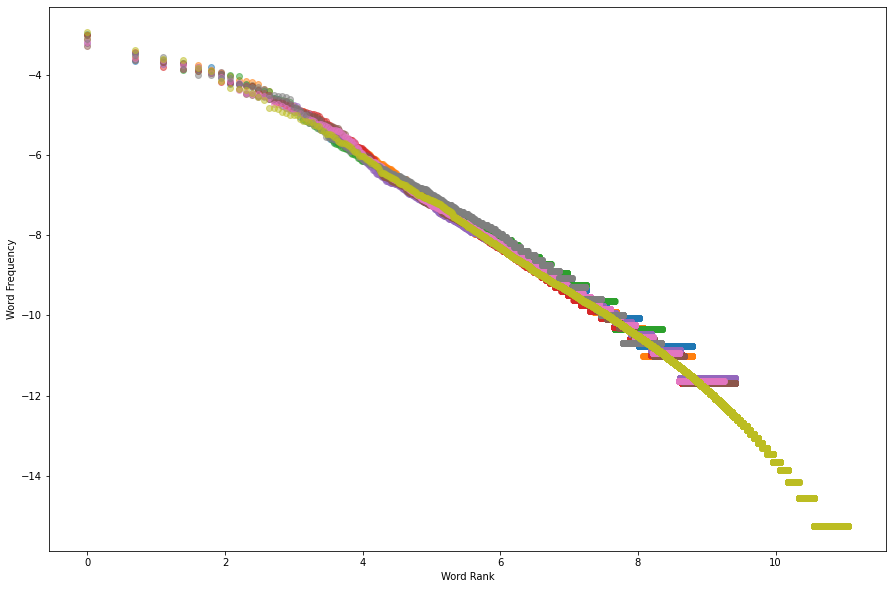

63348


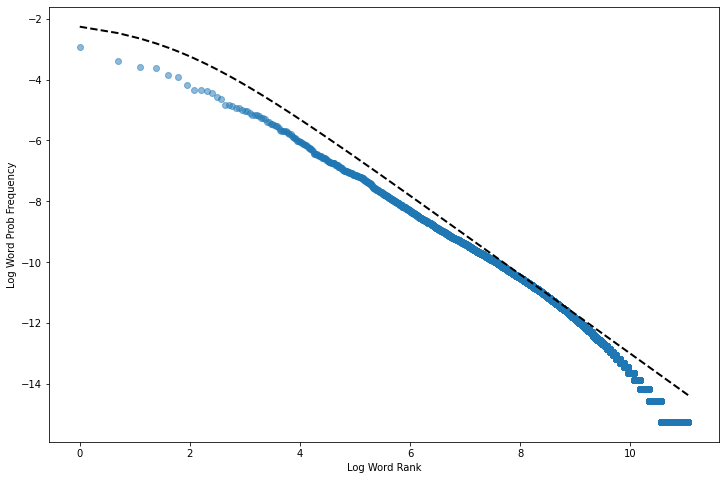

In [301]:
f_book_d = create_book_dictionary('french_books')
f_book_df = new_common_df(f_book_d)
new_slope(f_book_df, f_book_d)
plot_df(f_book_df)


f_full_text = tokenize_dictionary(f_book_d)
f_combine_test = combine_books_dictionary(f_book_d, "all_english_books")
f_book_df = new_common_df(combine_test,90000)
new_slope(f_book_df, f_combine_test,"yes")
f_full_text = tokenize_dictionary(f_combine_test)
f_expected_df = zipf_df(f_full_text,e_book_df)
plot_exp_df(f_book_df, f_expected_df)

-1.2837393599253035 slope on 13023 unique words and 195743 total words for The Iliad by Homer
-1.29953485759639 slope on 7647 unique words and 130607 total words for The Odyssey by Homer


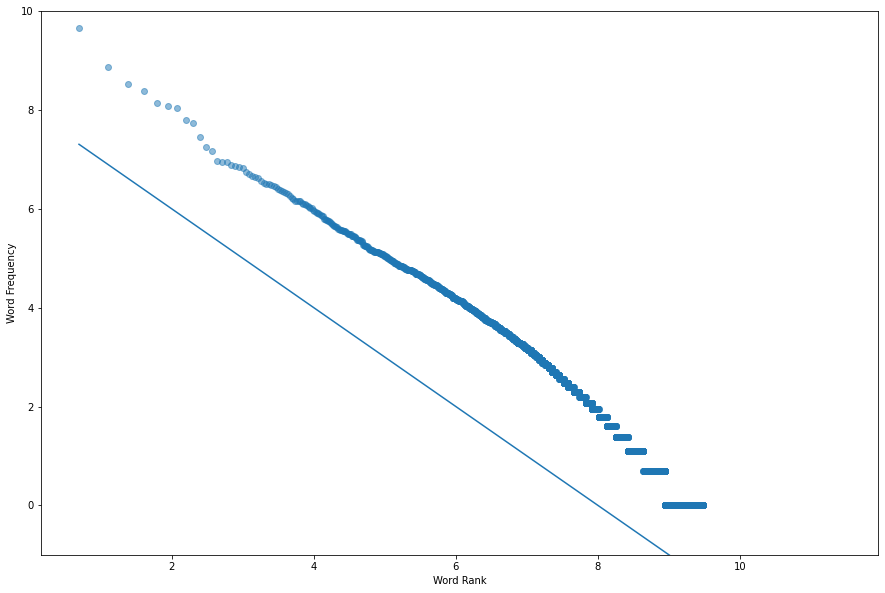

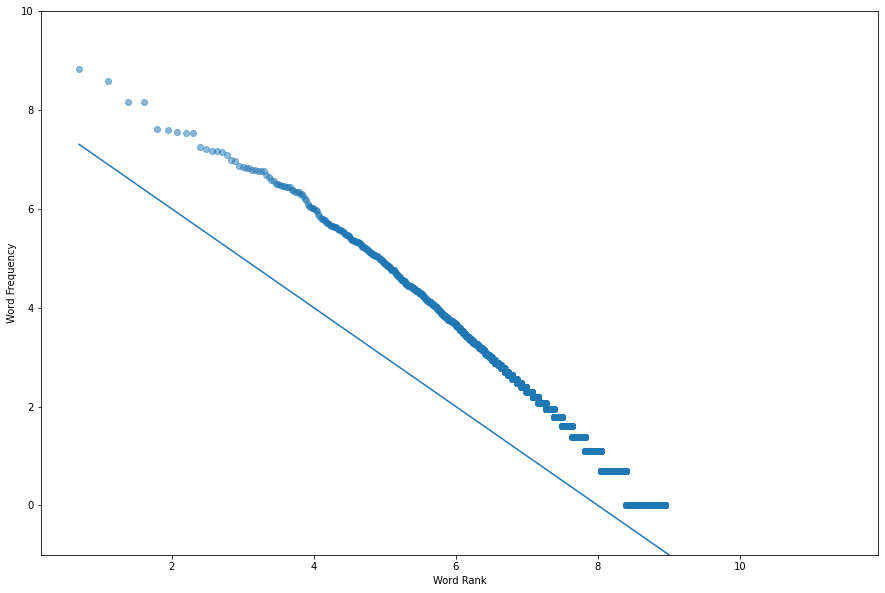

In [50]:
g_book_d = create_book_dictionary('greek_books')
g_book_df = new_common_df(g_book_d)
new_slope(g_book_df, g_book_d)
#plot_df(g_book_df)
full_text = tokenize_dictionary(g_book_d)
expected_df = zipf_df(full_text,g_book_df)
plot_exp_df(g_book_df, expected_df)

-0.7577228441143655 slope on 4519 unique words and 13218 total words for Ciceros_Orations_by_Cicero
-0.9209947162775061 slope on 4703 unique words and 20528 total words for Meditationes_de_prima_philosophia_by_René_Descartes
-0.578510701395389 slope on 8276 unique words and 17012 total words for Odes_and_Epodes_by_Horace
-0.8757689889710972 slope on 16637 unique words and 63802 total words for The_Aeneid_by_Virgil


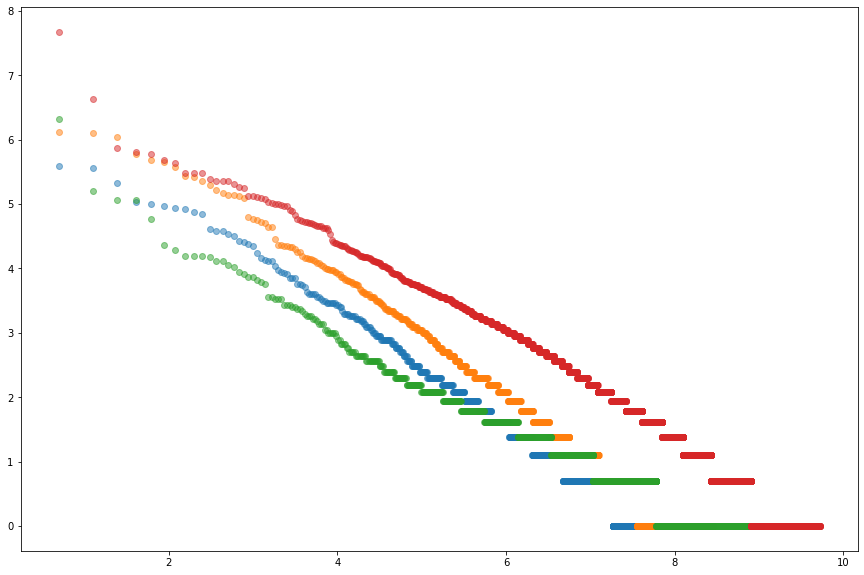

In [51]:
l_book_d = create_book_dictionary('latin_books')
l_book_df = new_common_df(l_book_d)
new_slope(l_book_df, l_book_d )
plot_df(l_book_df)

In [28]:
le_book_d = create_book_dictionary('latin_english_books')
le_book_df = new_common_df(le_book_d)
new_slope(le_book_df, le_book_d)
plot_df(le_book_df)
full_text = tokenize_dictionary(le_book_d)
expected_df = zipf_df(full_text,le_book_df)
plot_exp_df(le_book_df, expected_df)

NameError: name 'create_book_dictionary' is not defined

-1.1951165882340564 slope on 825 unique words and 6439 total words for Cat_in_the_Hat_Dr_Seuss
-1.3162671447385936 slope on 51 unique words and 809 total words for Green_Eggs_and_Ham_by_Dr_Seuss


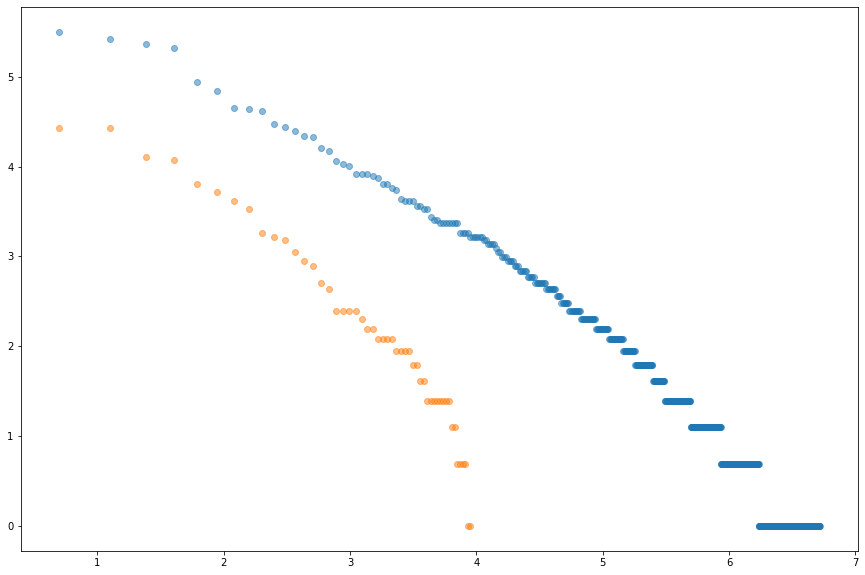

In [29]:
seuss_book_d = full_book_dictionary('seuss_books')
seuss_book_df = new_common_df(seuss_book_d)
new_slope(seuss_book_df, seuss_book_d)
plot_df(seuss_book_df)

In [30]:
seuss_dictionary = tokenize_dictionary(seuss_book_d)
seuss_dictionary

{'Cat_in_the_Hat_Dr_Seuss': ['The',
  'Cat',
  'in',
  'the',
  'Hat',
  'By',
  'Dr',
  'Seuss',
  'The',
  'sun',
  'did',
  'not',
  'shine',
  'It',
  'was',
  'too',
  'wet',
  'to',
  'play',
  'So',
  'we',
  'sat',
  'in',
  'the',
  'house',
  'All',
  'that',
  'cold',
  'cold',
  'wet',
  'day',
  'I',
  'sat',
  'there',
  'with',
  'Sally',
  'We',
  'sat',
  'there',
  'we',
  'two',
  'And',
  'I',
  'said',
  'How',
  'I',
  'wish',
  'We',
  'had',
  'something',
  'to',
  'do',
  'Too',
  'wet',
  'to',
  'go',
  'out',
  'And',
  'too',
  'cold',
  'to',
  'play',
  'ball',
  'So',
  'we',
  'sat',
  'in',
  'the',
  'house',
  'We',
  'did',
  'nothing',
  'at',
  'all',
  'So',
  'all',
  'we',
  'could',
  'do',
  'was',
  'to',
  'Sit',
  'Sit',
  'Sit',
  'Sit',
  'And',
  'we',
  'did',
  'not',
  'like',
  'it',
  'Not',
  'one',
  'little',
  'bit',
  'BUMP',
  'And',
  'then',
  'something',
  'went',
  'BUMP',
  'How',
  'that',
  'bump',
  'made',
  'us',


33594
33594
[('8am', 983), ('tc8g', 493), ('4odam', 461), ('oe', 428), ('sc8g', 426), ('toe', 394), ('am', 379), ('tcg', 339), ('4odcc8g', 302), ('odam', 299), ('8ar', 295), ('4odccg', 284), ('or', 281), ('scg', 274), ('4odc8g', 270), ('8ae', 255), ('ar', 247), ('2am', 242), ('oham', 220), ('tor', 216), ('8g', 208), ('4odae', 189), ('soe', 183), ('ae', 178), ('4oe', 170), ('tccg', 167), ('tcoe', 157), ('odccg', 149), ('tdzg', 144), ('4odar', 144), ('4odg', 143), ('2', 141), ('t8g', 141), ('tg', 138), ('dam', 138), ('ohc8g', 137), ('sccg', 133), ('4oham', 129), ('ohae', 129), ('odae', 127), ('ram', 121), ('ohar', 121), ('so', 118), ('etc8g', 116), ('hzg', 114), ('odar', 112), ('4odcg', 110), ('odc8g', 108), ('sg', 105), ('scoe', 105), ('8oe', 104), ('odcc8g', 102), ('8an', 99), ('8air', 99), ('ohccg', 97), ('ohg', 97), ('4ohc8g', 97), ('sor', 93), ('8ak', 93), ('4odoe', 87), ('ohcc8g', 85), ('odg', 84), ('2oe', 84), ('to8g', 83), ('4ohg', 83), ('tcor', 83), ('scc8g', 80), ('2ar', 77), (

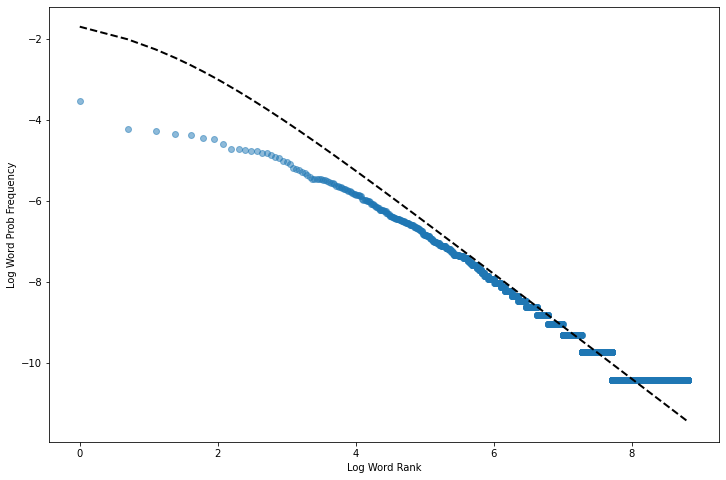

In [324]:
#manuscript_book_d = full_book_dictionary('manuscript_text')
manuscript_book_d = voynich_cleaner()
manuscript_df = full_common_df(manuscript_book_d)
#pfit_slope(manuscript_df)
print(manuscript_df.head())
m_full_text = tokenize_dictionary(manuscript_book_d)
m_expected_df = zipf_df(m_full_text, manuscript_df)
plot_exp_df(manuscript_df, m_expected_df)
#new_slope(manuscript_df, expected_df, "yes")

In [89]:
new_df = script_test(manuscript_book_d)
new_corpus = spilt_corpus(new_df)
print(new_corpus)

       xg     yg
0     485  484.0
1     257  241.0
2     208  231.0
3     207  224.0
4     198  228.0
...   ...    ...
7379    0    1.0
7380    1    0.0
7381    1    0.0
7382    1    0.0
7383    1    0.0

[7384 rows x 2 columns]


In [321]:
print(np.random.binomial(10, .5, 1)[0])
print(manuscript_book_d)

4
{'voynich_script': '#\n#\n#\n#\n#\n#\n#\n#\n\x0c\n#\nFGAG2,GDAE,AR,GHAM,SOE,SORG,0D0RC2,GDOR,SOE8G-\n2ORG,DZAR,ORG,DAIR,THAM,SOR,AR,HZAR,HZAR,8ALA-\n2GAIIR,SCDG,OR,GDAM,SO8,HZOARG,HZC2,8ARAM,2G-\n0OM,OHCCG,OHCAR,ROEOHG,HZAAR,8AM,ODAM,OR,ODAL-\n2AIRG,TCAR,HZAM,PZAR,FZAM=\nG8ARAISG=\nO8AR,SG,SOE,PZOG,OG8AR,S,2,FZOAM,SO8ARG-\nGSCG,SO8G,ODTO,G,OHTOE,TOHZG,O2TG,8AN,TOR,DO2-\n8AM,SOR,FZOE,SO8G=\n8AN,02,HCO8G=\nG8AN,PZC2AM,OE2,PZCG,GHAN,SOSG,PZO8AEC2-\nODSO,DSOG,OHAIRN,OHCOE,ODAL,SO8AN,2DZCG,8AM-\nSOG,DZCG,DO8AM,PZG,PZ08AIIE2,HZCG,SC,OE8AN,8-\n8AN,OM,TOE,O8AM,TO8AN,T8G,ODON,80R,HZG,DO8-\n8AM,SDZCG,DZOR,TOR,SCG,DOE,TOE,TOE,DOR,TOE-\nSO,TOE,SO8AL,DSG,DTG,8OR,TO8AM,SO,DOCAK-\nGTO,HTCG,TCDAN,SCO,PSOE,8G8G8,HZG,8AIHZG-\nGHO,SOE,SC,DO8SCG,PZCAEG,8ARAN,8AN,DZG82-\n8TAR,SHZAM,ODAIIR,TCG,2TG,PZHOE,HZOE2,8AOCHA-\nSOD,TOR,TCG,8AN,DZCG=\nOHOE,8AIM=\nPZO,SAM,SODTCCG,TOE,HSO8CC2G,SCG,PG8CCG,TG,RO8-\n00ON,TOE,8AN,HZAE,8AR,SCAR,DAM,8AR,SCG,HZCAR-\nCTO00,DAM,SOAM,ODOE,8AM,FAR,HZOE,8AM,HZOE8AR-\nGTCCG,ODCCG,

In [86]:
def script_test(book_d_test):
    column_name_list = list((range(1, 90000 + 1)))
    
    log_name_list = []
    for r in column_name_list:
        log_name_list.append(math.log(r))
    
    column_name = ['rank_log']
    cmn_word_df = pd.DataFrame(columns=column_name)
    cmn_word_df['rank_log']= log_name_list
    #cmn_word_df.loc[0,:] = log_name_list
    
    count = 0
    book_index = []
    for b in book_d_test:
        word_rank = 0 
        false_word = ['s','t','n','5','10','15','20']
        ind = []
        fre = []
        fretwo = []
        book_df_header = [b]
        single_book_df = pd.DataFrame(columns=book_df_header)
        run = 1
        book_token_words = [x.lower() for x in regexp_tokenize(book_d_test[b], '\w+')]
        if len(book_token_words) > 0:
            book_index.append(b)
            book_token_counter = Counter(book_token_words).most_common()
            max_fre = 0
            for item in book_token_counter:
                if item[0] not in false_word:
                    ind.append(item[0])
                    fre.append(item[1])
                    fretwo.append(math.log(item[1]))
                    if (item[1]*run) > max_fre:
                        max_fre = item[1]*run
                    run = run + 1
                    word_rank = word_rank + 1
            single_book_df[b] = fre
            cmn_word_df = pd.concat([cmn_word_df,single_book_df], axis=1)
            #cmn_word_df.loc[count+1,:] = fretwo
            count = count + 1
    return(cmn_word_df)

In [70]:
plt.rcParams["figure.figsize"] = [20, 15]
count = 0
for row in word_df.iterrows():
    if count != 0:
        plt.plot(word_df.loc[0,:], word_df.loc[count,:], alpha=.5, linewidth='4')
    count = count + 1

In [28]:
count = 0

for b in book_word_d:
    if count < 10:
        print(b)
        count = count + 1
        false_word = ['s','t','n']
        ind = []
        fre = []
        fretwo = []
        run = 1
        book_token_words = [x.lower() for x in regexp_tokenize(book_word_d[b], '\w+')]
        book_token_counter = Counter(book_token_words).most_common(100)
        for item in book_token_counter:
            if item[0] not in false_word:
                ind.append(item[0])
                fre.append(item[1])
                fretwo.append(item[1]*run)
                run = run + 1
        plt.bar(ind, fretwo, alpha =  .75)
        plt.xticks(rotation='vertical')
        plt.show()

C:\Users\cmerr\AppData\Local\Temp\ipykernel_14672\319768858.py:3: RuntimeWarning: divide by zero encountered in log
  x_graph = np.log(x)


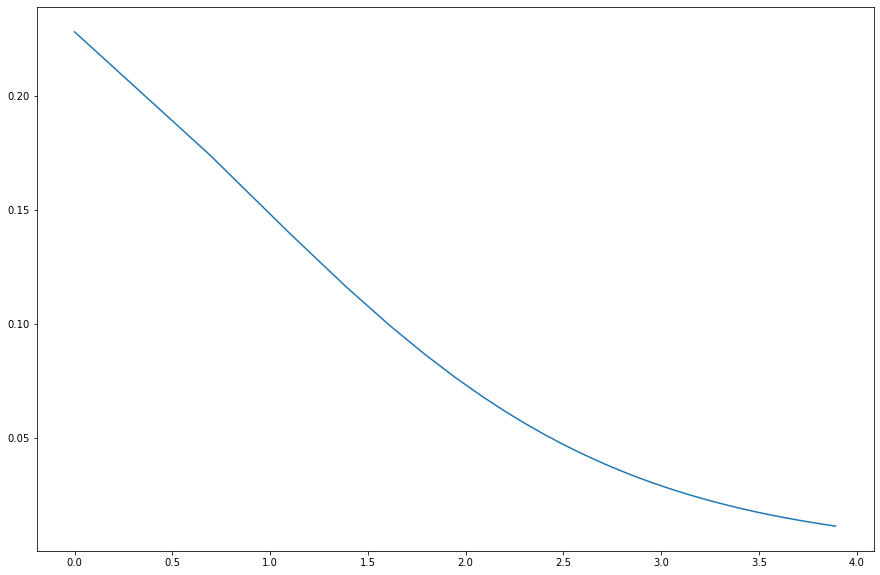

In [679]:
x=[1,2,3,4,5,6,7,8,9,10,11,12]
x = np.array(range(50))
x_graph = np.log(x)
y = 1/((x+2.7)**1.13)
plt.plot(x_graph,y)
plt.show()

C:\Users\cmerr\AppData\Local\Temp\ipykernel_16812\3452909541.py:4: RuntimeWarning: divide by zero encountered in log
  x_graph = np.log(x)


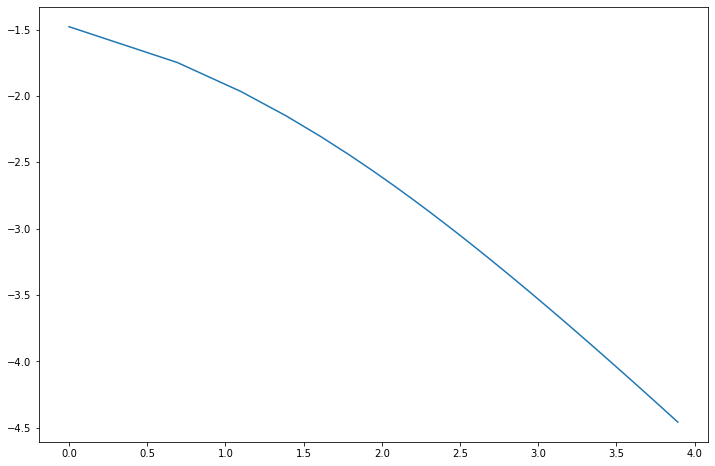

In [157]:
new_corpus
x=[1,2,3,4,5,6,7,8,9,10,11,12]
x = np.array(range(50))
x_graph = np.log(x)
y = 1/((x+2.7)**1.13)
y_graph = np.log(y)
plt.plot(x_graph,y_graph)
plt.show()

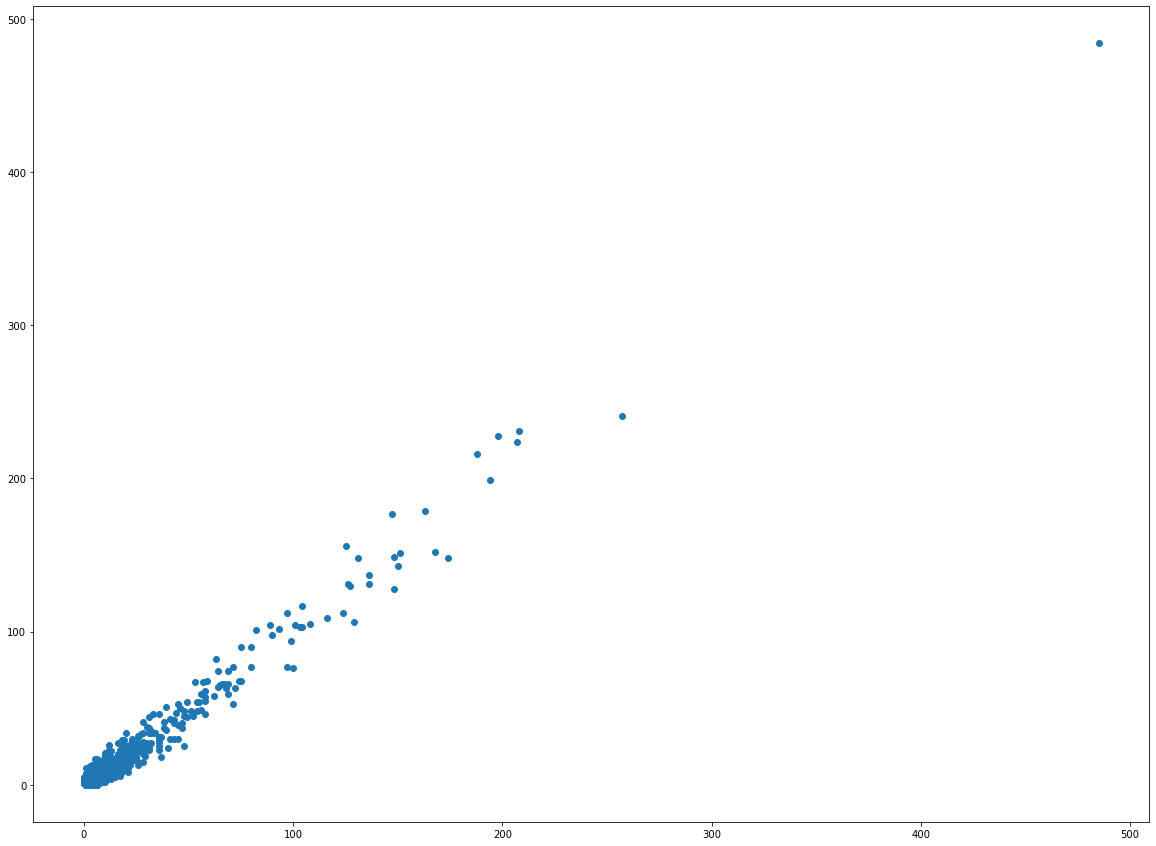

In [95]:
new_corpus.iloc[:,1]
x = new_corpus["xg"]
y = new_corpus["yg"]
plt.scatter(x,y)
plt.show()